In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

def read_trip(filename):
    col_names = ['obj_id', 'lat', 'lon', 'timestamp', 'unknown1', 'unknow2']
    trip = pd.read_csv(filename, header=None, names=col_names)
    trip.drop(['unknown1', 'unknow2'], axis=1, inplace=True)
    trip['geometry'] = trip.apply(lambda z: Point(z.lon, z.lat), axis=1)
    trip = gpd.GeoDataFrame(trip)
    return trip

trip_file = 'data/trips/trip_0.txt'
trip = read_trip(trip_file)

In [2]:
trip.head()

,obj_id,lat,lon,timestamp,geometry
0,20000589,41.141412,-8.618643,1372636858,POINT (-8.618642999999999 41.141412)
1,20000589,41.141376,-8.618499,1372636873,POINT (-8.618499 41.141376)
2,20000589,41.142510,-8.620326,1372636888,POINT (-8.620325999999999 41.14250999999999)
3,20000589,41.143815,-8.622153,1372636903,POINT (-8.622152999999999 41.143815)
4,20000589,41.144373,-8.623953,1372636918,POINT (-8.623953 41.144373)


In [3]:
for i in range(0,len(trip)):
    print trip.iloc[i]['geometry'] 

POINT (-8.618642999999999 41.141412)
POINT (-8.618499 41.141376)
POINT (-8.620325999999999 41.14250999999999)
POINT (-8.622152999999999 41.143815)
POINT (-8.623953 41.144373)
POINT (-8.62668 41.144778)
POINT (-8.627373 41.144697)
POINT (-8.630225999999999 41.14521)
POINT (-8.632746000000001 41.14692)
POINT (-8.631738 41.148225)
POINT (-8.629938000000001 41.150385)
POINT (-8.629110000000001 41.151213)
POINT (-8.629128 41.15124)
POINT (-8.628786 41.152203)
POINT (-8.628686999999999 41.152374)
POINT (-8.628759000000001 41.152518)
POINT (-8.630838000000001 41.15268)
POINT (-8.632323 41.153022)
POINT (-8.631144000000001 41.154489)
POINT (-8.630828999999999 41.154507)
POINT (-8.630828999999999 41.154516)
POINT (-8.630828999999999 41.154498)
POINT (-8.630838000000001 41.154489)


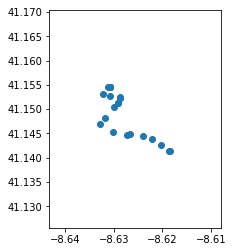

In [4]:
%matplotlib inline
trip.plot()

### plot trajectory on map

In [5]:
def plot_trip_on_map(trip):
    import folium
    # trip to points
    points = []
    for row in trip.to_records(index=False):
        points.append(tuple([row['lat'], row['lon']]))
    #print points
    # load map
    lon = (trip['lon'].min() + trip['lon'].max())/2
    lat = (trip['lat'].min() + trip['lat'].max())/2
    map_porto = folium.Map(location=[lat,lon], zoom_start=15)
    # add lines
    folium.PolyLine(points, color='red', weight=2.5, opacity=1).add_to(map_porto)
    # add markers
    #for p in points:
    #    folium.Marker(p).add_to(map_porto)
    for i in range(len(points)):
        if i==0:
            folium.Marker(points[i], popup='start',icon=folium.Icon(color='green')).add_to(map_porto)
        elif i==len(points)-1:
            folium.Marker(points[i], popup='end',icon=folium.Icon(color='red')).add_to(map_porto)
        else:
            folium.RegularPolygonMarker(points[i], popup=str(i), fill_color='#45647d',number_of_sides=8, radius=10).add_to(map_porto)
    return map_porto

In [6]:
plot_trip_on_map(trip)

In [7]:
#plot_nodes_on_map()
def plot_vertices_on_map(vertices):
    import folium
    # trip to points
    points = []
    for row in nodes.to_records(index=False):
        points.append(tuple([row['lat'], row['lon']]))
    #print points
    # load map
    lon = (trip['lon'].min() + trip['lon'].max())/2
    lat = (trip['lat'].min() + trip['lat'].max())/2
    map_porto = folium.Map(location=[lat,lon], zoom_start=7)
    # add markers
    for p in points:
        folium.RegularPolygonMarker(p, fill_color='#45647d',number_of_sides=8, radius=4).add_to(map_porto)
    return map_porto

In [8]:
list(trip['geometry'])

In [9]:
from shapely.geometry import LineString
line = LineString(list(trip['geometry']))

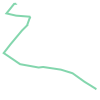

In [10]:
%matplotlib inline
line

In [11]:
line.bounds

(-8.632746000000001, 41.141376, -8.618499, 41.154516)

In [12]:
type(line.bounds)

tuple

In [13]:
import smopy

Lowered zoom level to keep map size reasonable. (z = 15)


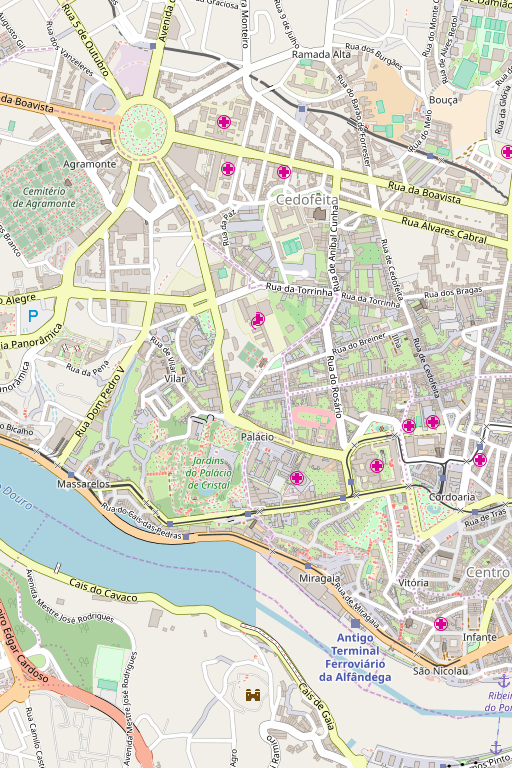

In [21]:
map = smopy.Map((41.141376, -8.632746000000001, 41.154516, -8.618499), z=17)
map.show_ipython()

In [15]:
x,y = map.to_pixels(trip['lat'], trip['lon'])

In [16]:
zip(x,y)

[(387.06216960027814, 640.6505930861458),
 (390.4176128003746, 641.764487481676),
 (347.8454271997325, 606.6765203112736),
 (305.2732416000217, 566.2967596035451),
 (263.3302016002126, 549.0306856362149),
 (199.78649600036442, 536.4987657414749),
 (183.63842559978366, 539.0051559126005),
 (117.15870720008388, 523.1312992107123),
 (58.43845120025799, 470.21754663810134),
 (81.92655359953642, 429.8350702300668),
 (123.8695935998112, 362.9933431232348),
 (143.16339199990034, 337.3700971985236),
 (142.74396159965545, 336.5345511222258),
 (150.71313920011744, 306.7331827287562),
 (153.0200063996017, 301.4413051903248),
 (151.34228480001912, 296.98497655801475),
 (102.89807359967381, 291.97159514576197),
 (68.295065600425, 281.3877492574975),
 (95.7677567997016, 235.98799445061013),
 (103.10778879979625, 235.4309359351173),
 (103.10778879979625, 235.15240661986172),
 (103.10778879979625, 235.70946521218866),
 (102.89807359967381, 235.98799445061013)]

In [17]:
type(x)

pandas.core.series.Series

In [18]:
list(x)

[387.06216960027814,
 390.4176128003746,
 347.8454271997325,
 305.2732416000217,
 263.3302016002126,
 199.78649600036442,
 183.63842559978366,
 117.15870720008388,
 58.43845120025799,
 81.92655359953642,
 123.8695935998112,
 143.16339199990034,
 142.74396159965545,
 150.71313920011744,
 153.0200063996017,
 151.34228480001912,
 102.89807359967381,
 68.295065600425,
 95.7677567997016,
 103.10778879979625,
 103.10778879979625,
 103.10778879979625,
 102.89807359967381]

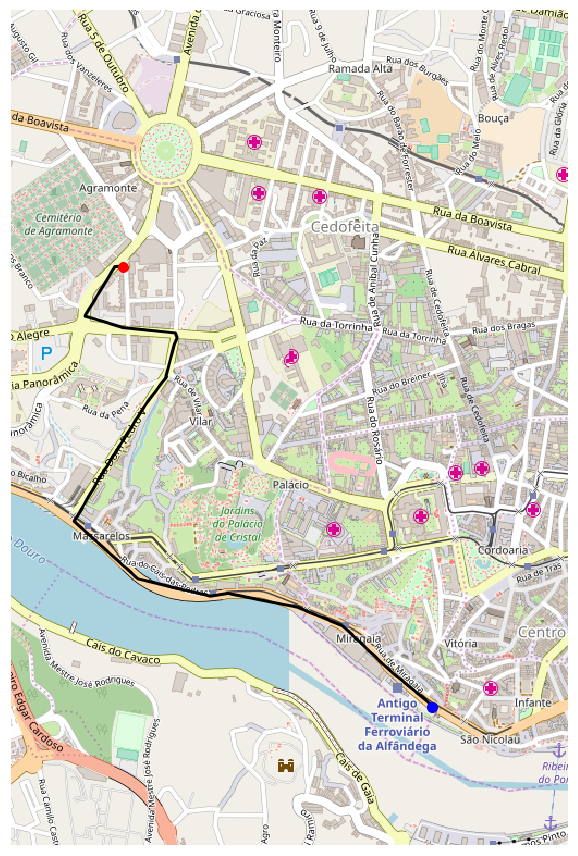

In [23]:
ax = map.show_mpl(figsize=(10, 12))
# Plot the itinerary.
ax.plot(x, y, '-k', lw=3)
# Mark our two positions.
ax.plot(list(x)[0], list(y)[0], 'bo', ms=10)
ax.plot(list(x)[-1], list(y)[-1], 'ro', ms=10)

In [26]:
(minx, miny, maxx, maxy) = trip['geometry'].bounds

In [27]:
print (minx, miny, maxx, maxy)

('minx', 'miny', 'maxx', 'maxy')


In [29]:
type(trip['geometry'].bounds)

pandas.core.frame.DataFrame

In [30]:
trip['geometry'].bounds.minx

0    -8.618643
1    -8.618499
2    -8.620326
3    -8.622153
4    -8.623953
5    -8.626680
6    -8.627373
7    -8.630226
8    -8.632746
9    -8.631738
10   -8.629938
11   -8.629110
12   -8.629128
13   -8.628786
14   -8.628687
15   -8.628759
16   -8.630838
17   -8.632323
18   -8.631144
19   -8.630829
20   -8.630829
21   -8.630829
22   -8.630838
Name: minx, dtype: float64

In [31]:
trip['geometry'].bounds

,minx,miny,maxx,maxy
0,-8.618643,41.141412,-8.618643,41.141412
1,-8.618499,41.141376,-8.618499,41.141376
2,-8.620326,41.142510,-8.620326,41.142510
3,-8.622153,41.143815,-8.622153,41.143815
4,-8.623953,41.144373,-8.623953,41.144373
5,-8.626680,41.144778,-8.626680,41.144778
6,-8.627373,41.144697,-8.627373,41.144697
7,-8.630226,41.145210,-8.630226,41.145210
8,-8.632746,41.146920,-8.632746,41.146920
9,-8.631738,41.148225,-8.631738,41.148225


In [32]:
line.bounds

(-8.632746000000001, 41.141376, -8.618499, 41.154516)

In [33]:
(minx, miny, maxx, maxy) = line.bounds

In [34]:
print (minx, miny, maxx, maxy)

(-8.632746000000001, 41.141376, -8.618499, 41.154516)


In [36]:
p=Point(1,2)

In [40]:
type(trip['lat'])

pandas.core.series.Series